In [1]:
import os

import numpy as np
import mplhep as hep
import uproot
from egamma_tnp.plot import plot_efficiency, plot_ratio
from matplotlib import pyplot as plt

In [2]:
hep.style.use("CMS")
hep.style.use(
    {
        "figure.figsize": (6.4, 4.8),
        "font.size": 14,
        "legend.title_fontsize": 14,
        "savefig.bbox": "tight",
    }
)


def get_histograms(path):
    with uproot.open(path) as file:
        hpt_barrel_pass = file["pt/barrel/passing"].to_hist()
        hpt_barrel_all = file["pt/barrel/all"].to_hist()
        hpt_endcap_loweta_pass = file["pt/endcap_loweta/passing"].to_hist()
        hpt_endcap_loweta_all = file["pt/endcap_loweta/all"].to_hist()
        hpt_endcap_higheta_pass = file["pt/endcap_higheta/passing"].to_hist()
        hpt_endcap_higheta_all = file["pt/endcap_higheta/all"].to_hist()
        hpt_combined_pass = (
            hpt_barrel_pass + hpt_endcap_loweta_pass + hpt_endcap_higheta_pass
        )
        hpt_combined_all = (
            hpt_barrel_all + hpt_endcap_loweta_all + hpt_endcap_higheta_all
        )

        heta_entire_pass = file["eta/entire/passing"].to_hist()
        heta_entire_all = file["eta/entire/all"].to_hist()

        hphi_entire_pass = file["phi/entire/passing"].to_hist()
        hphi_entire_all = file["phi/entire/all"].to_hist()

    return (
        hpt_barrel_pass,
        hpt_barrel_all,
        hpt_endcap_loweta_pass,
        hpt_endcap_loweta_all,
        hpt_endcap_higheta_pass,
        hpt_endcap_higheta_all,
        hpt_combined_pass,
        hpt_combined_all,
        heta_entire_pass,
        heta_entire_all,
        hphi_entire_pass,
        hphi_entire_all,
    )


def pt_low_threshold_plot_setup(**legend_kwargs):
    plt.xlim(10, 400)
    plt.ylim(0, 1.2)
    plt.xlabel(r"Offline electron $P_T$ [GeV]")
    plt.ylabel(r"Efficiency")
    plt.xscale("log")
    plt.xticks([10, 100], [10, 100])
    plt.xticks(
        [20, 30, 40, 50, 60, 70, 80, 90, 200, 300, 400],
        [20, 30, 40, 50, None, None, None, None, 200, 300, 400],
        minor=True,
    )
    plt.legend(**legend_kwargs) if legend_kwargs else plt.legend()


def pt_high_threshold_plot_setup(**legend_kwargs):
    plt.xlim(10, 400)
    plt.ylim(0, 1.2)
    plt.xlabel(r"Offline electron $P_T$ [GeV]")
    plt.ylabel(r"Efficiency")
    plt.legend(**legend_kwargs) if legend_kwargs else plt.legend()


def eta_plot_setup(**legend_kwargs):
    plt.xlim(-2.5, 2.5)
    plt.ylim(0, 1.2)
    plt.xlabel(r"Offline electron $\eta$")
    plt.ylabel(r"Efficiency")
    plt.legend(**legend_kwargs) if legend_kwargs else plt.legend()


def phi_plot_setup(**legend_kwargs):
    plt.xlim(-3.32, 3.32)
    plt.ylim(0, 1.2)
    plt.xlabel(r"Offline electron $\phi$")
    plt.ylabel(r"Efficiency")
    plt.legend(**legend_kwargs) if legend_kwargs else plt.legend()


lumis = {
    "2022C": 5.0707,
    "2022D": 3.0063,
    "2022E": 5.8783,
    "2022F": 18.0070,
    "2022G": 3.1219,
    "2023B": 0.622,
    "2023C": 17.060,
    "2023D": 9.525,
}

In [3]:
# folders = [
#     x
#     for x in os.listdir("Winter24hists/")
#     if "4To50" not in x and "4to50" not in x and not x.startswith(".")
# ]
# folders.remove(
#     "DYJetsToLL_M-50_TuneCP5_13p6TeV-madgraphMLM-pythia8_Run3Winter24NanoAOD-NoPU_Pilot_133X_mcRun3_2024_realistic_v6-v2_NANOAODSIM"
# )
folders = [
    x
    for x in os.listdir("Ravindra_mc/")
    if not x.endswith(".pdf") and not x.startswith(".")
]
folders

['data_EGamma_Run2022E',
 'data_EGamma_Run2022C',
 'mc_DY_NLO_2023preBPIX',
 'data_EGamma_Run2022D',
 'mc_DY_NLO_2022postEE',
 'mc_DY_LO_2023PreBPIX',
 'mc_DY_LO_2023postBPIX',
 'mc_DY_NLO_2022preEE',
 'data_EGamma_Run2022F',
 'data_EGamma_Run2022G',
 'mc_DY_NLO_2023postBPIX',
 'mc_DY_LO_2022postEE',
 'mc_DY_LO_M50_2024',
 'mc_DY_LO_2022preEE',
 'data_EGamma_Run2023',
 'mc_DY_LO_MLL50_2024',
 'data_EGamma_Run2023C',
 'data_EGamma_Run2023D',
 'data_EGamma_Run2022',
 'data_EGamma_Run2023B']

# HLT Single

In [ ]:
triggers = [
    "Ele30",
    "Ele32",
    "Ele115",
    "Ele135",
    "Ele23Ele12Leg1",
    "Ele23Ele12Leg2",
    "DoubleEle33SeededLeg",
    "DoubleEle33UnseededLeg",
]

for folder in folders:
    for trigger in triggers:
        file = f"{trigger}_hists.root"
        # run = f"{folder.split('_')[:2][0]}_{folder.split('_')[:2][1]}"
        run = folder.split("_")[2][3:] if "data" in folder else folder.split("_", 1)[1]
        threshold = trigger
        if threshold == "Ele32" or threshold == "Ele30":
            suffix = "WPTight_Gsf"
        elif threshold == "Ele115" or threshold == "Ele135":
            suffix = "CaloIdVT_GsfTrkIdT"
        elif threshold == "DoubleEle33SeededLeg":
            suffix = "CaloIdL_MW Seeded leg"
        elif threshold == "DoubleEle33UnseededLeg":
            suffix = "CaloIdL_MW Unseeded leg"
        elif threshold == "Ele23Ele12Leg1":
            suffix = "CaloIdL_TrackIdL_IsoVL Leg1"
        elif threshold == "Ele23Ele12Leg2":
            suffix = "CaloIdL_TrackIdL_IsoVL Leg2"
        else:
            raise ValueError("Couldn't find proper trigger name")

        # filename = threshold
        # threshold = threshold.replace("_leg1", "").replace("_leg2", "")
        filename = threshold
        threshold = (
            threshold.replace("Leg1", "")
            .replace("Leg2", "")
            .replace("SeededLeg", "")
            .replace("UnseededLeg", "")
        )

        pt_setup_func = (
            pt_high_threshold_plot_setup
            if threshold == "Ele115" or threshold == "Ele135"
            else pt_low_threshold_plot_setup
        )
        title = f"HLT_{threshold}_{suffix}"

        try:
            lumi = lumis[run]
        except KeyError:
            if run == "2022":
                lumi = (
                    lumis["2022C"]
                    + lumis["2022D"]
                    + lumis["2022E"]
                    + lumis["2022F"]
                    + lumis["2022G"]
                )
            elif run == "2023":
                lumi = lumis["2023B"] + lumis["2023C"] + lumis["2023D"]
            else:
                lumi = "X"
        if lumi != "X":
            lumi = round(lumi, 1)

        if "2022" in run:
            year = "2022"
        elif "2023" in run:
            year = "2023"
        else:
            year = "2024"

        (
            hpt_barrel_pass,
            hpt_barrel_all,
            hpt_endcap_loweta_pass,
            hpt_endcap_loweta_all,
            hpt_endcap_higheta_pass,
            hpt_endcap_higheta_all,
            hpt_combined_pass,
            hpt_combined_all,
            heta_entire_pass,
            heta_entire_all,
            hphi_entire_pass,
            hphi_entire_all,
        ) = get_histograms(f"Ravindra_mc/{folder}/{file}")

        plot_efficiency(
            hpt_barrel_pass,
            hpt_barrel_all,
            label=f"{run} $0.00 < |\eta| < 1.44$",
            color="k",
            zorder=3,
        )
        plot_efficiency(
            hpt_endcap_loweta_pass,
            hpt_endcap_loweta_all,
            label=f"{run} $1.57 < |\eta| < 2.00$",
            color="gray",
            zorder=2,
        )
        plot_efficiency(
            hpt_endcap_higheta_pass,
            hpt_endcap_higheta_all,
            label=f"{run} $2.00 < |\eta| < 2.50$",
            color="r",
            zorder=1,
        )

        hep.cms.label(
            data=False,
            lumi=lumi,
            year=year,
            com=13.6,
        )
        pt_setup_func(loc="lower right", title=title)
        plt.ylabel("L1T + HLT Efficiency")
        plt.savefig(f"Ravindra_mc/{filename}_{run}_HLT_eff_pt.pdf")
        plt.close()

        plot_efficiency(
            heta_entire_pass,
            heta_entire_all,
            label=f"{run} $0.00 < |\eta| < 2.50$",
            color="k",
        )

        hep.cms.label(
            data=False,
            lumi=lumi,
            year=year,
            com=13.6,
        )
        eta_plot_setup(loc="lower center", title=title)
        plt.ylabel("L1T + HLT Efficiency")
        plt.savefig(f"Ravindra_mc/{filename}_{run}_HLT_eff_eta.pdf")
        plt.close()

        plot_efficiency(
            hphi_entire_pass,
            hphi_entire_all,
            label=f"{run} $0.00 < |\eta| < 2.50$",
            color="k",
        )

        hep.cms.label(
            data=False,
            lumi=lumi,
            year=year,
            com=13.6,
        )
        phi_plot_setup(loc="lower center", title=title)
        plt.ylabel("L1T + HLT Efficiency")
        plt.savefig(f"Ravindra_mc/{filename}_{run}_HLT_eff_phi.pdf")
        plt.close()

## HLT comparison

In [ ]:
hlt_paths = {
    "Ele30": "passHltEle30WPTightGsf",
    "Ele32": "passHltEle32WPTightGsf",
    "Ele115": "passHltEle115CaloIdVTGsfTrkIdTGsf",
    "Ele135": "passHltEle135CaloIdVTGsfTrkIdTGsf",
    "Ele23Ele12Leg1": "passHltEle23Ele12CaloIdLTrackIdLIsoVLLeg1L1match",
    "Ele23Ele12Leg2": "passHltEle23Ele12CaloIdLTrackIdLIsoVLLeg2",
    "DoubleEle33SeededLeg": "passHltDoubleEle33CaloIdLMWSeedLegL1match",
    "DoubleEle33UnseededLeg": "passHltDoubleEle33CaloIdLMWUnsLeg",
}

In [ ]:
for tala in list(hlt_paths.keys()):
    # for data_period in ["data_EGamma_Run2023", "data_EGamma_Run2023D"]:
    for data_period in [x for x in folders if "2023" in x and "mc" in x]:
        for mc_dataset in ["mc_DY_LO_M50_2024", "mc_DY_LO_MLL50_2024"]:
            tocompare = [data_period, mc_dataset]
            run = []
            for folder in tocompare:
                run.append(
                    folder.split("_")[2][3:]
                    if "data" in folder
                    else folder.split("_", 1)[1]
                )
            threshold = tala
            if threshold == "Ele32" or threshold == "Ele30":
                suffix = "WPTight_Gsf"
            elif threshold == "Ele115" or threshold == "Ele135":
                suffix = "CaloIdVT_GsfTrkIdT"
            elif threshold == "DoubleEle33SeededLeg":
                suffix = "CaloIdL_MW Seeded leg"
            elif threshold == "DoubleEle33UnseededLeg":
                suffix = "CaloIdL_MW Unseeded leg"
            elif threshold == "Ele23Ele12Leg1":
                suffix = "CaloIdL_TrackIdL_IsoVL Leg1"
            elif threshold == "Ele23Ele12Leg2":
                suffix = "CaloIdL_TrackIdL_IsoVL Leg2"
            else:
                raise ValueError("Couldn't find proper trigger name")

            plateau_cut_dict = {
                "Ele30": 35,
                "Ele32": 35,
                "Ele115": 120,
                "Ele135": 140,
                "Ele23Ele12Leg1": 25,
                "Ele23Ele12Leg2": 15,
                "DoubleEle33SeededLeg": 35,
                "DoubleEle33UnseededLeg": 35,
            }
            plateau_cut = plateau_cut_dict[threshold]

            filename = threshold
            threshold = (
                threshold.replace("Leg1", "")
                .replace("Leg2", "")
                .replace("SeededLeg", "")
                .replace("UnseededLeg", "")
            )

            plottype = (
                "pt_high_threshold"
                if threshold == "Ele115" or threshold == "Ele135"
                else "pt_low_threshold"
            )
            title = f"HLT_{threshold}_{suffix}"
            lumi = []
            for r in run:
                try:
                    l = lumis[r]
                except KeyError:
                    if r == "2022":
                        l = (
                            lumis["2022C"]
                            + lumis["2022D"]
                            + lumis["2022E"]
                            + lumis["2022F"]
                            + lumis["2022G"]
                        )
                    elif r == "2023":
                        l = lumis["2023B"] + lumis["2023C"] + lumis["2023D"]
                    else:
                        l = "X"
                if not isinstance(l, str):
                    l = round(l, 1)
                lumi.append(l)

            year = []
            for r in run:
                if "2022" in r:
                    year.append("2022")
                elif "2023" in r:
                    year.append("2023")
                else:
                    year.append("2024")

            rlabel = f"{lumi[0]} $fb^{{-1}}$, {year[0]} (13.6 TeV) - {lumi[1]} $fb^{{-1}}$, {year[1]} (13.6 TeV)"

            (
                hpt_barrel_pass1,
                hpt_barrel_all1,
                hpt_endcap_loweta_pass1,
                hpt_endcap_loweta_all1,
                hpt_endcap_higheta_pass1,
                hpt_endcap_higheta_all1,
                hpt_combined_pass1,
                hpt_combined_all1,
                heta_entire_pass1,
                heta_entire_all1,
                hphi_entire_pass1,
                hphi_entire_all1,
            ) = get_histograms(f"Ravindra_mc/{tocompare[0]}/{filename}_hists.root")

            (
                hpt_barrel_pass2,
                hpt_barrel_all2,
                hpt_endcap_loweta_pass2,
                hpt_endcap_loweta_all2,
                hpt_endcap_higheta_pass2,
                hpt_endcap_higheta_all2,
                hpt_combined_pass2,
                hpt_combined_all2,
                heta_entire_pass2,
                heta_entire_all2,
                hphi_entire_pass2,
                hphi_entire_all2,
            ) = get_histograms(f"Ravindra_mc/{tocompare[1]}/{filename}_hists.root")

            plot_ratio(
                hpt_barrel_pass1,
                hpt_barrel_all1,
                hpt_barrel_pass2,
                hpt_barrel_all2,
                label1=f"{run[0]} $0.00 < |\eta| < 1.44$",
                label2=f"{run[1]} $0.00 < |\eta| < 1.44$",
                plottype=plottype,
                figure_path=f"Ravindra_mc/{filename}_{run[0]}_vs_{run[1]}_HLT_eff_barrel_pt.pdf",
                legend_kwargs={"title": title},
                cms_kwargs={"loc": 1, "rlabel": rlabel},
                efficiency_label="L1T + HLT Efficiency",
            )

            plot_ratio(
                hpt_endcap_loweta_pass1,
                hpt_endcap_loweta_all1,
                hpt_endcap_loweta_pass2,
                hpt_endcap_loweta_all2,
                label1=f"{run[0]} $1.57 < |\eta| < 2.00$",
                label2=f"{run[1]} $1.57 < |\eta| < 2.00$",
                plottype=plottype,
                figure_path=f"Ravindra_mc/{filename}_{run[0]}_vs_{run[1]}_HLT_eff_endcap_loweta_pt.pdf",
                legend_kwargs={"title": title},
                cms_kwargs={"loc": 1, "rlabel": rlabel},
                efficiency_label="L1T + HLT Efficiency",
            )

            plot_ratio(
                hpt_endcap_higheta_pass1,
                hpt_endcap_higheta_all1,
                hpt_endcap_higheta_pass2,
                hpt_endcap_higheta_all2,
                label1=f"{run[0]} $2.00 < |\eta| < 2.50$",
                label2=f"{run[1]} $2.00 < |\eta| < 2.50$",
                plottype=plottype,
                figure_path=f"Ravindra_mc/{filename}_{run[0]}_vs_{run[1]}_HLT_eff_endcap_higheta_pt.pdf",
                legend_kwargs={"title": title},
                cms_kwargs={"loc": 1, "rlabel": rlabel},
                efficiency_label="L1T + HLT Efficiency",
            )

            plot_ratio(
                hpt_combined_pass1,
                hpt_combined_all1,
                hpt_combined_pass2,
                hpt_combined_all2,
                label1=f"{run[0]} $0.00 < |\eta| < 1.44$ or $1.57 < |\eta| < 2.50$",
                label2=f"{run[1]} $0.00 < |\eta| < 1.44$ or $1.57 < |\eta| < 2.50$",
                plottype=plottype,
                figure_path=f"Ravindra_mc/{filename}_{run[0]}_vs_{run[1]}_HLT_eff_combined_pt.pdf",
                legend_kwargs={"title": title},
                cms_kwargs={"loc": 1, "rlabel": rlabel},
                efficiency_label="L1T + HLT Efficiency",
            )

            plot_ratio(
                heta_entire_pass1,
                heta_entire_all1,
                heta_entire_pass2,
                heta_entire_all2,
                label1=f"{run[0]} $0.00 < |\eta| < 2.50$",
                label2=f"{run[1]} $0.00 < |\eta| < 2.50$",
                plottype="eta",
                figure_path=f"Ravindra_mc/{filename}_{run[0]}_vs_{run[1]}_HLT_eff_eta.pdf",
                legend_kwargs={
                    "title": f"{title}\nProbe electron $P_T> {plateau_cut}$ GeV"
                },
                cms_kwargs={"loc": 1, "rlabel": rlabel},
                efficiency_label="L1T + HLT Efficiency",
            )

            plot_ratio(
                hphi_entire_pass1,
                hphi_entire_all1,
                hphi_entire_pass2,
                hphi_entire_all2,
                label1=f"{run[0]} $0.00 < |\eta| < 2.50$",
                label2=f"{run[1]} $0.00 < |\eta| < 2.50$",
                plottype="phi",
                figure_path=f"Ravindra_mc/{filename}_{run[0]}_vs_{run[1]}_HLT_eff_phi.pdf",
                legend_kwargs={
                    "title": f"{title}\nProbe electron $P_T> {plateau_cut}$ GeV"
                },
                cms_kwargs={"loc": 1, "rlabel": rlabel},
                efficiency_label="L1T + HLT Efficiency",
            )

In [4]:
folders

['data_EGamma_Run2022E',
 'data_EGamma_Run2022C',
 'mc_DY_NLO_2023preBPIX',
 'data_EGamma_Run2022D',
 'mc_DY_NLO_2022postEE',
 'mc_DY_LO_2023PreBPIX',
 'mc_DY_LO_2023postBPIX',
 'mc_DY_NLO_2022preEE',
 'data_EGamma_Run2022F',
 'data_EGamma_Run2022G',
 'mc_DY_NLO_2023postBPIX',
 'mc_DY_LO_2022postEE',
 'mc_DY_LO_M50_2024',
 'mc_DY_LO_2022preEE',
 'data_EGamma_Run2023',
 'mc_DY_LO_MLL50_2024',
 'data_EGamma_Run2023C',
 'data_EGamma_Run2023D',
 'data_EGamma_Run2022',
 'data_EGamma_Run2023B']

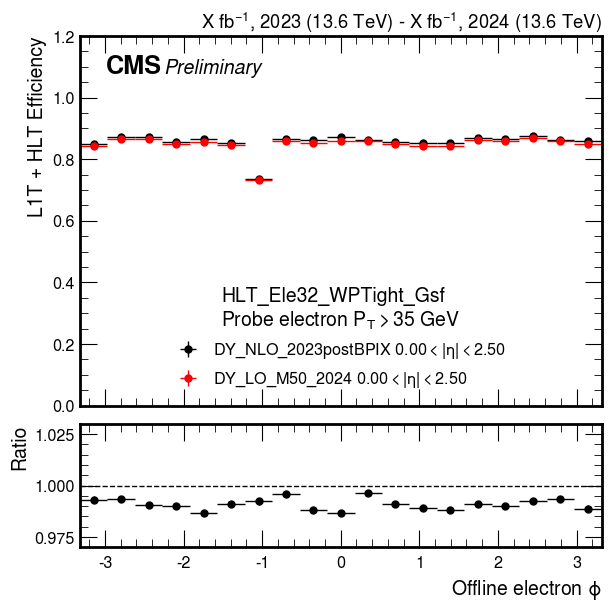

In [6]:
tala = "Ele32"
tocompare = ["mc_DY_NLO_2023postBPIX", "mc_DY_LO_M50_2024"]
run = []
for folder in tocompare:
    run.append(
        folder.split("_")[2][3:] if "data" in folder else folder.split("_", 1)[1]
    )
threshold = tala
if threshold == "Ele32" or threshold == "Ele30":
    suffix = "WPTight_Gsf"
elif threshold == "Ele115" or threshold == "Ele135":
    suffix = "CaloIdVT_GsfTrkIdT"
elif threshold == "DoubleEle33SeededLeg":
    suffix = "CaloIdL_MW Seeded leg"
elif threshold == "DoubleEle33UnseededLeg":
    suffix = "CaloIdL_MW Unseeded leg"
elif threshold == "Ele23Ele12Leg1":
    suffix = "CaloIdL_TrackIdL_IsoVL Leg1"
elif threshold == "Ele23Ele12Leg2":
    suffix = "CaloIdL_TrackIdL_IsoVL Leg2"
else:
    raise ValueError("Couldn't find proper trigger name")

plateau_cut_dict = {
    "Ele30": 35,
    "Ele32": 35,
    "Ele115": 120,
    "Ele135": 140,
    "Ele23Ele12Leg1": 25,
    "Ele23Ele12Leg2": 15,
    "DoubleEle33SeededLeg": 35,
    "DoubleEle33UnseededLeg": 35,
}
plateau_cut = plateau_cut_dict[threshold]

filename = threshold
threshold = (
    threshold.replace("Leg1", "")
    .replace("Leg2", "")
    .replace("SeededLeg", "")
    .replace("UnseededLeg", "")
)

plottype = (
    "pt_high_threshold"
    if threshold == "Ele115" or threshold == "Ele135"
    else "pt_low_threshold"
)
title = f"HLT_{threshold}_{suffix}"
lumi = []
for r in run:
    try:
        l = lumis[r]
    except KeyError:
        if r == "2022":
            l = (
                lumis["2022C"]
                + lumis["2022D"]
                + lumis["2022E"]
                + lumis["2022F"]
                + lumis["2022G"]
            )
        elif r == "2023":
            l = lumis["2023B"] + lumis["2023C"] + lumis["2023D"]
        else:
            l = "X"
    if not isinstance(l, str):
        l = round(l, 1)
    lumi.append(l)

year = []
for r in run:
    if "2022" in r:
        year.append("2022")
    elif "2023" in r:
        year.append("2023")
    else:
        year.append("2024")

rlabel = f"{lumi[0]} $fb^{{-1}}$, {year[0]} (13.6 TeV) - {lumi[1]} $fb^{{-1}}$, {year[1]} (13.6 TeV)"

(
    hpt_barrel_pass1,
    hpt_barrel_all1,
    hpt_endcap_loweta_pass1,
    hpt_endcap_loweta_all1,
    hpt_endcap_higheta_pass1,
    hpt_endcap_higheta_all1,
    hpt_combined_pass1,
    hpt_combined_all1,
    heta_entire_pass1,
    heta_entire_all1,
    hphi_entire_pass1,
    hphi_entire_all1,
) = get_histograms(f"Ravindra_mc/{tocompare[0]}/{filename}_hists.root")

(
    hpt_barrel_pass2,
    hpt_barrel_all2,
    hpt_endcap_loweta_pass2,
    hpt_endcap_loweta_all2,
    hpt_endcap_higheta_pass2,
    hpt_endcap_higheta_all2,
    hpt_combined_pass2,
    hpt_combined_all2,
    heta_entire_pass2,
    heta_entire_all2,
    hphi_entire_pass2,
    hphi_entire_all2,
) = get_histograms(f"Ravindra_mc/{tocompare[1]}/{filename}_hists.root")

plot_ratio(
    hpt_barrel_pass1,
    hpt_barrel_all1,
    hpt_barrel_pass2,
    hpt_barrel_all2,
    label1=f"{run[0]} $0.00 < |\eta| < 1.44$",
    label2=f"{run[1]} $0.00 < |\eta| < 1.44$",
    plottype=plottype,
    figure_path=f"{filename}_{run[0]}_vs_{run[1]}_HLT_eff_barrel_pt.pdf",
    legend_kwargs={"title": title},
    cms_kwargs={"loc": 1, "rlabel": rlabel},
    efficiency_label="L1T + HLT Efficiency",
)

plot_ratio(
    hpt_endcap_loweta_pass1,
    hpt_endcap_loweta_all1,
    hpt_endcap_loweta_pass2,
    hpt_endcap_loweta_all2,
    label1=f"{run[0]} $1.57 < |\eta| < 2.00$",
    label2=f"{run[1]} $1.57 < |\eta| < 2.00$",
    plottype=plottype,
    figure_path=f"{filename}_{run[0]}_vs_{run[1]}_HLT_eff_endcap_loweta_pt.pdf",
    legend_kwargs={"title": title},
    cms_kwargs={"loc": 1, "rlabel": rlabel},
    efficiency_label="L1T + HLT Efficiency",
)

plot_ratio(
    hpt_endcap_higheta_pass1,
    hpt_endcap_higheta_all1,
    hpt_endcap_higheta_pass2,
    hpt_endcap_higheta_all2,
    label1=f"{run[0]} $2.00 < |\eta| < 2.50$",
    label2=f"{run[1]} $2.00 < |\eta| < 2.50$",
    plottype=plottype,
    figure_path=f"{filename}_{run[0]}_vs_{run[1]}_HLT_eff_endcap_higheta_pt.pdf",
    legend_kwargs={"title": title},
    cms_kwargs={"loc": 1, "rlabel": rlabel},
    efficiency_label="L1T + HLT Efficiency",
)

plot_ratio(
    hpt_combined_pass1,
    hpt_combined_all1,
    hpt_combined_pass2,
    hpt_combined_all2,
    label1=f"{run[0]} $0.00 < |\eta| < 1.44$ or $1.57 < |\eta| < 2.50$",
    label2=f"{run[1]} $0.00 < |\eta| < 1.44$ or $1.57 < |\eta| < 2.50$",
    plottype=plottype,
    figure_path=f"{filename}_{run[0]}_vs_{run[1]}_HLT_eff_combined_pt.pdf",
    legend_kwargs={"title": title},
    cms_kwargs={"loc": 1, "rlabel": rlabel},
    efficiency_label="L1T + HLT Efficiency",
)

plot_ratio(
    heta_entire_pass1,
    heta_entire_all1,
    heta_entire_pass2,
    heta_entire_all2,
    label1=f"{run[0]} $0.00 < |\eta| < 2.50$",
    label2=f"{run[1]} $0.00 < |\eta| < 2.50$",
    plottype="eta",
    figure_path=f"{filename}_{run[0]}_vs_{run[1]}_HLT_eff_eta.pdf",
    legend_kwargs={"title": f"{title}\nProbe electron $P_T> {plateau_cut}$ GeV"},
    cms_kwargs={"loc": 1, "rlabel": rlabel},
    efficiency_label="L1T + HLT Efficiency",
)

plot_ratio(
    hphi_entire_pass1,
    hphi_entire_all1,
    hphi_entire_pass2,
    hphi_entire_all2,
    label1=f"{run[0]} $0.00 < |\eta| < 2.50$",
    label2=f"{run[1]} $0.00 < |\eta| < 2.50$",
    plottype="phi",
    figure_path=f"{filename}_{run[0]}_vs_{run[1]}_HLT_eff_phi.pdf",
    legend_kwargs={"title": f"{title}\nProbe electron $P_T> {plateau_cut}$ GeV"},
    cms_kwargs={"loc": 1, "rlabel": rlabel},
    efficiency_label="L1T + HLT Efficiency",
)